In [0]:
# Dicionario de avalicoes de filmes (pequeno conjunto) 
avaliacoes= {
    'Batman': {'Filme 1': 2, 'Filme 2': 4, 'Filme 3': 5, 'Filme 4': 4, 'Filme 5': 2}, 
    'Dom Juan': {'Filme 1': 2, 'Filme 2': 4,'Filme 3': 5, 'Filme 4': 4, 'Filme 5': 3, 'Filme 6': 3, 'Filme 7': 5}, 
    'Madona': {'Filme 1': 2, 'Filme 2': 5, "Filme 3": 5, 'Filme 4': 4, 'Filme 5': 2, 'Filme 6': 2, 'Filme 7': 5}, 
    'Lady Gaga': {'Filme 1': 4, 'Filme 2': 1, 'Filme 3': 1,'Filme 4': 1, 'Filme 5': 5, 'Filme 6': 4, 'Filme 7': 1},
    'Reginaldo': {'Filme 1': 2, 'Filme 2': 4, 'Filme 3': 4,'Filme 4': 3, 'Filme 5': 4, 'Filme 6': 5, 'Filme 7': 2}
}

In [0]:
# Retorna o coeficiente de correlacao de pearson para p1 e p2
def sim_pearson(prefs, p1, p2):
  # Pega a lista de itens mutuamente classificados
  si = {}
  for item in prefs[p1]: 
    if item in prefs[p2]: si[item] = 1

  # se nao tiverem avaliacoes em comum retorna 0
  if len(si) == 0: return 0

  # calcula a soma
  n = len(si)
  
  # soma todas as preferencias
  sum1 = sum([prefs[p1][it] for it in si])
  sum2 = sum([prefs[p2][it] for it in si])
  
  # soma os quadrados das prefs
  sum1Sq = sum([pow(prefs[p1][it],2) for it in si])
  sum2Sq = sum([pow(prefs[p2][it],2) for it in si])	
  
  # soma os produtos
  pSum = sum([prefs[p1][it]*prefs[p2][it] for it in si])
  
  # calcula a correlacao
  num = pSum - (sum1*sum2/n)
  den = sqrt((sum1Sq - pow(sum1, 2)/n) * (sum2Sq - pow(sum2, 2) / n))
  if den == 0: return 0

  r=num/den

  return r

In [0]:
from math import sqrt

# Retorna a similaridade baseada na distancia entre a pessoa1 e a pessoa2
# usa dist Euclidiana

def sim_distance(prefs,pessoa1,pessoa2):
  
  # Pega a lista de itens
  si = {}
  for item in prefs[pessoa1]: 
    if item in prefs[pessoa2]: 
      si[item] = 1

  # se as pessoas 1 e 2 nao tem classificacoes em comum entao retorne 0
  if len(si) == 0: 
    return 0

  # soma os quadrados de todas as diferencas
  sum_of_squares = sum([pow(prefs[pessoa1][item] - prefs[pessoa2][item], 2) for item in 
                        prefs[pessoa1] if item in prefs[pessoa2]])

  return 1 / ( 1 + sum_of_squares)

In [0]:
# retorna os melhores resultados para cada pessoa do conjunto de avaliacoes
# numero de resultados e funcao de similaridade sao parametros opcionais

def topMatches(prefs, person, n = 5, similarity = sim_pearson):
  
  #pega cada usuario U sem ser o user alvo A e calcula a correlacao dele com A
  scores=[(similarity(prefs, person, other),other) 
                  for other in prefs if other != person]
  
  #ordena a lista para que as maiores notas aparecam no topo
  scores.sort()
  scores.reverse()
  return scores[0:n]

In [0]:
# obtem recomendacoes para uma pessoa usando uma media ponderada
# de cada avaliacao dos outros usuarios
def getRecommendations(prefs, person, coef_viz = 0.0, similarity = sim_pearson):
  totals = {}
  simSums = {}
  for other in prefs:
    # nao me compare comigo mesmo
    if other == person: 
      continue
    sim = similarity(prefs, person, other)

    # ignorar notas zero ou menores que um coeficiente de vizinhança
    if sim<=coef_viz: 
      continue
    for item in prefs[other]:
      # apenas notas de filmes que eu ainda nao vi
      if item not in prefs[person] or prefs[person][item] == 0:
        # Similaridade * nota
        totals.setdefault(item, 0)
        totals[item] += prefs[other][item] * sim
        # Soma de similaridades
        simSums.setdefault(item, 0)
        simSums[item] += sim

  # Cria a lista normalizada
  rankings = [(total / simSums[item], item) for item,total in 
              totals.items()]

  # retorna a lista ordenada
  rankings.sort()
  rankings.reverse()
  return rankings

In [0]:
def similarity_plot(user1, user2, figsize1=(10, 5)):
  import matplotlib.pyplot as plt
  users_list = [user1, user2]
  plt.figure(figsize=figsize1)

  # itera pegando o valor das chaves do dicionário, que no caso são os nomes dos usuários
  for user in users_list:
      # acessa os valores dos subdicionários a partir da chave recuperada
      plt.plot(['Filme ' + str(f + 1) for f in range(len(avaliacoes[user]))], avaliacoes[user].values(), label=user, alpha=0.6)
      plt.legend()

In [0]:
def similarity_scatter(user1, user2, figsize1=(10, 5)):
  import matplotlib.pyplot as plt
  users_list = [user1, user2]
  plt.figure(figsize=figsize1)

  # itera pegando o valor das chaves do dicionário, que no caso são os nomes dos usuários
  for user in users_list:
      # acessa os valores dos subdicionários a partir da chave recuperada
      plt.scatter(['Filme ' + str(f + 1) for f in range(len(avaliacoes[user]))], avaliacoes[user].values(), label=user, alpha=0.6)
      plt.legend()

In [0]:
user1 = 'Batman'
user2 = 'Reginaldo'

#testando a similaridade de 2 usuarios da base
sim_pearson(avaliacoes, user1, user2)


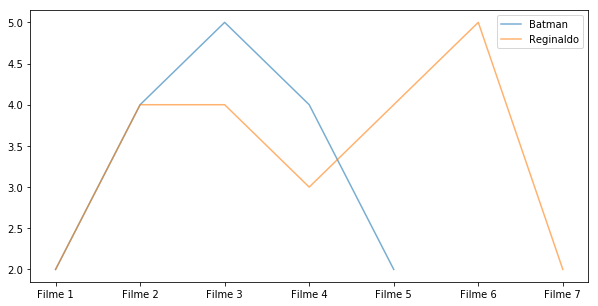

In [65]:
#graficamente a similaridade de user1 e user2
similarity_plot(user1, user2)

In [0]:
#quais os usuários mais parecidos com Batman?
topMatches(avaliacoes, 'Batman')

In [66]:
#obter recomendacoes de filmes para o Batman
getRecommendations(avaliacoes, 'Batman', 0.0)

[(4.41850647378939, 'Filme 7'), (2.982362329371904, 'Filme 6')]

In [0]:
#RECOMENDACAO BASEADA EM ITENS
 #inverter o dicionario de avaliacoes
def transformPrefs(prefs):
  result={}
  for person in prefs:
    for item in prefs[person]:
      result.setdefault(item,{})
      
      # troca pessoas com item
      result[item][person]=prefs[person][item]
  return result

In [0]:
def calculateSimilarItems(prefs,n=10):
  # cria um dicionario de itens mostrando com quais outros itens eles sao mais parecidos
  result={}
  # inverte a matriz de preferencias para que ela seja baseada em itens
  itemPrefs=transformPrefs(prefs)
  c=0
  for item in itemPrefs:
    # atualizacoes de estado para grandes conjuntos de dados
    c += 1
    if c % 100 == 0: 
      print ('%d / %d' % (c, len(itemPrefs)))
    
    # encontre os itens mais similares ao atual
    scores=topMatches(itemPrefs, item, n=n, similarity=sim_distance)
    result[item] = scores
  
  return result

In [0]:
def getRecommendedItems(prefs,itemMatch,user):
  userRatings=prefs[user]
  scores={}
  totalSim={}
  # iteracao pelos itens classificados por este usuario
  for (item,rating) in userRatings.items( ):

    # iteracao por itens similares a este
    for (similarity,item2) in itemMatch[item]:

      # ignora se esse usuario ja deu nota para esse item antes
      if item2 in userRatings: continue
      # soma ponderada de nota vezes a similaridade
      scores.setdefault(item2,0)
      scores[item2]+=similarity*rating
      # soma de todas a similaridades
      totalSim.setdefault(item2,0)
      totalSim[item2]+=similarity

  # Divide cada nota total pelo fator de ponderacao total para conseguir uma media
  rankings=[(score/totalSim[item],item) for item,score in scores.items( )]

  # retorna as notas da maior para a menor
  rankings.sort( )
  rankings.reverse( )
  return rankings